In [39]:
import pandas as pd
import numpy as np
import json
import copy
import string
import re
import nltk
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('popular')
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


import matplotlib.pyplot as plt
np.random.seed(0)




[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

**Reading News Dataset from News_Category_Dataset_v2.json**

In [0]:
News_Dataset = pd.read_json('News_Category_Dataset_v2.json', lines=True)

In [41]:
News_Dataset.head(6)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26


**Combining column's Headline & Short Description into Combined_H&SD**

In [0]:
News_Dataset['Combined_H&SD']=News_Dataset['headline']+News_Dataset['short_description']

In [0]:
stemmer = PorterStemmer()

In [0]:
def process_text(value):
    no_punc=[char for char in value if char not in string.punctuation]
    new1=''.join(no_punc)
    new2=[stemmer.stem(word) for word in new1]
    new3=''.join(new2)
    return[word for word in new3.split()if word.lower()not in stopwords.words('english') ]

In [45]:
News_Dataset['Combined_H&SD'].head()

0    There Were 2 Mass Shootings In Texas Last Week...
1    Will Smith Joins Diplo And Nicky Jam For The 2...
2    Hugh Grant Marries For The First Time At Age 5...
3    Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4    Julianna Margulies Uses Donald Trump Poop Bags...
Name: Combined_H&SD, dtype: object

**After Processing of column- Combined_H&SD using Stemmer**

In [46]:
News_Dataset['Combined_H&SD'].head(5).apply(process_text)

0    [2, Mass, Shootings, Texas, Last, Week, 1, TVS...
1    [Smith, Joins, Diplo, Nicky, Jam, 2018, World,...
2    [Hugh, Grant, Marries, First, Time, Age, 57The...
3    [Jim, Carrey, Blasts, Castrato, Adam, Schiff, ...
4    [Julianna, Margulies, Uses, Donald, Trump, Poo...
Name: Combined_H&SD, dtype: object

**Splitting of News Data set Into Train, Test & Development**

In [0]:
train_title, test_title, train_category, test_category = train_test_split(News_Dataset['Combined_H&SD'],News_Dataset['category'])
train_title, devp_title, train_category, devp_category = train_test_split(train_title,train_category)

**Number of Records for train, Test & Development**

In [48]:
print("Training Records    : ",len(train_title))
print("Developement Records: ",len(devp_title))
print("Testing Records     : ",len(test_title))

Training Records    :  112979
Developement Records:  37660
Testing Records     :  50214


**Visualized the Data of combined_H&SD using WordCloud**

<Figure size 432x288 with 0 Axes>

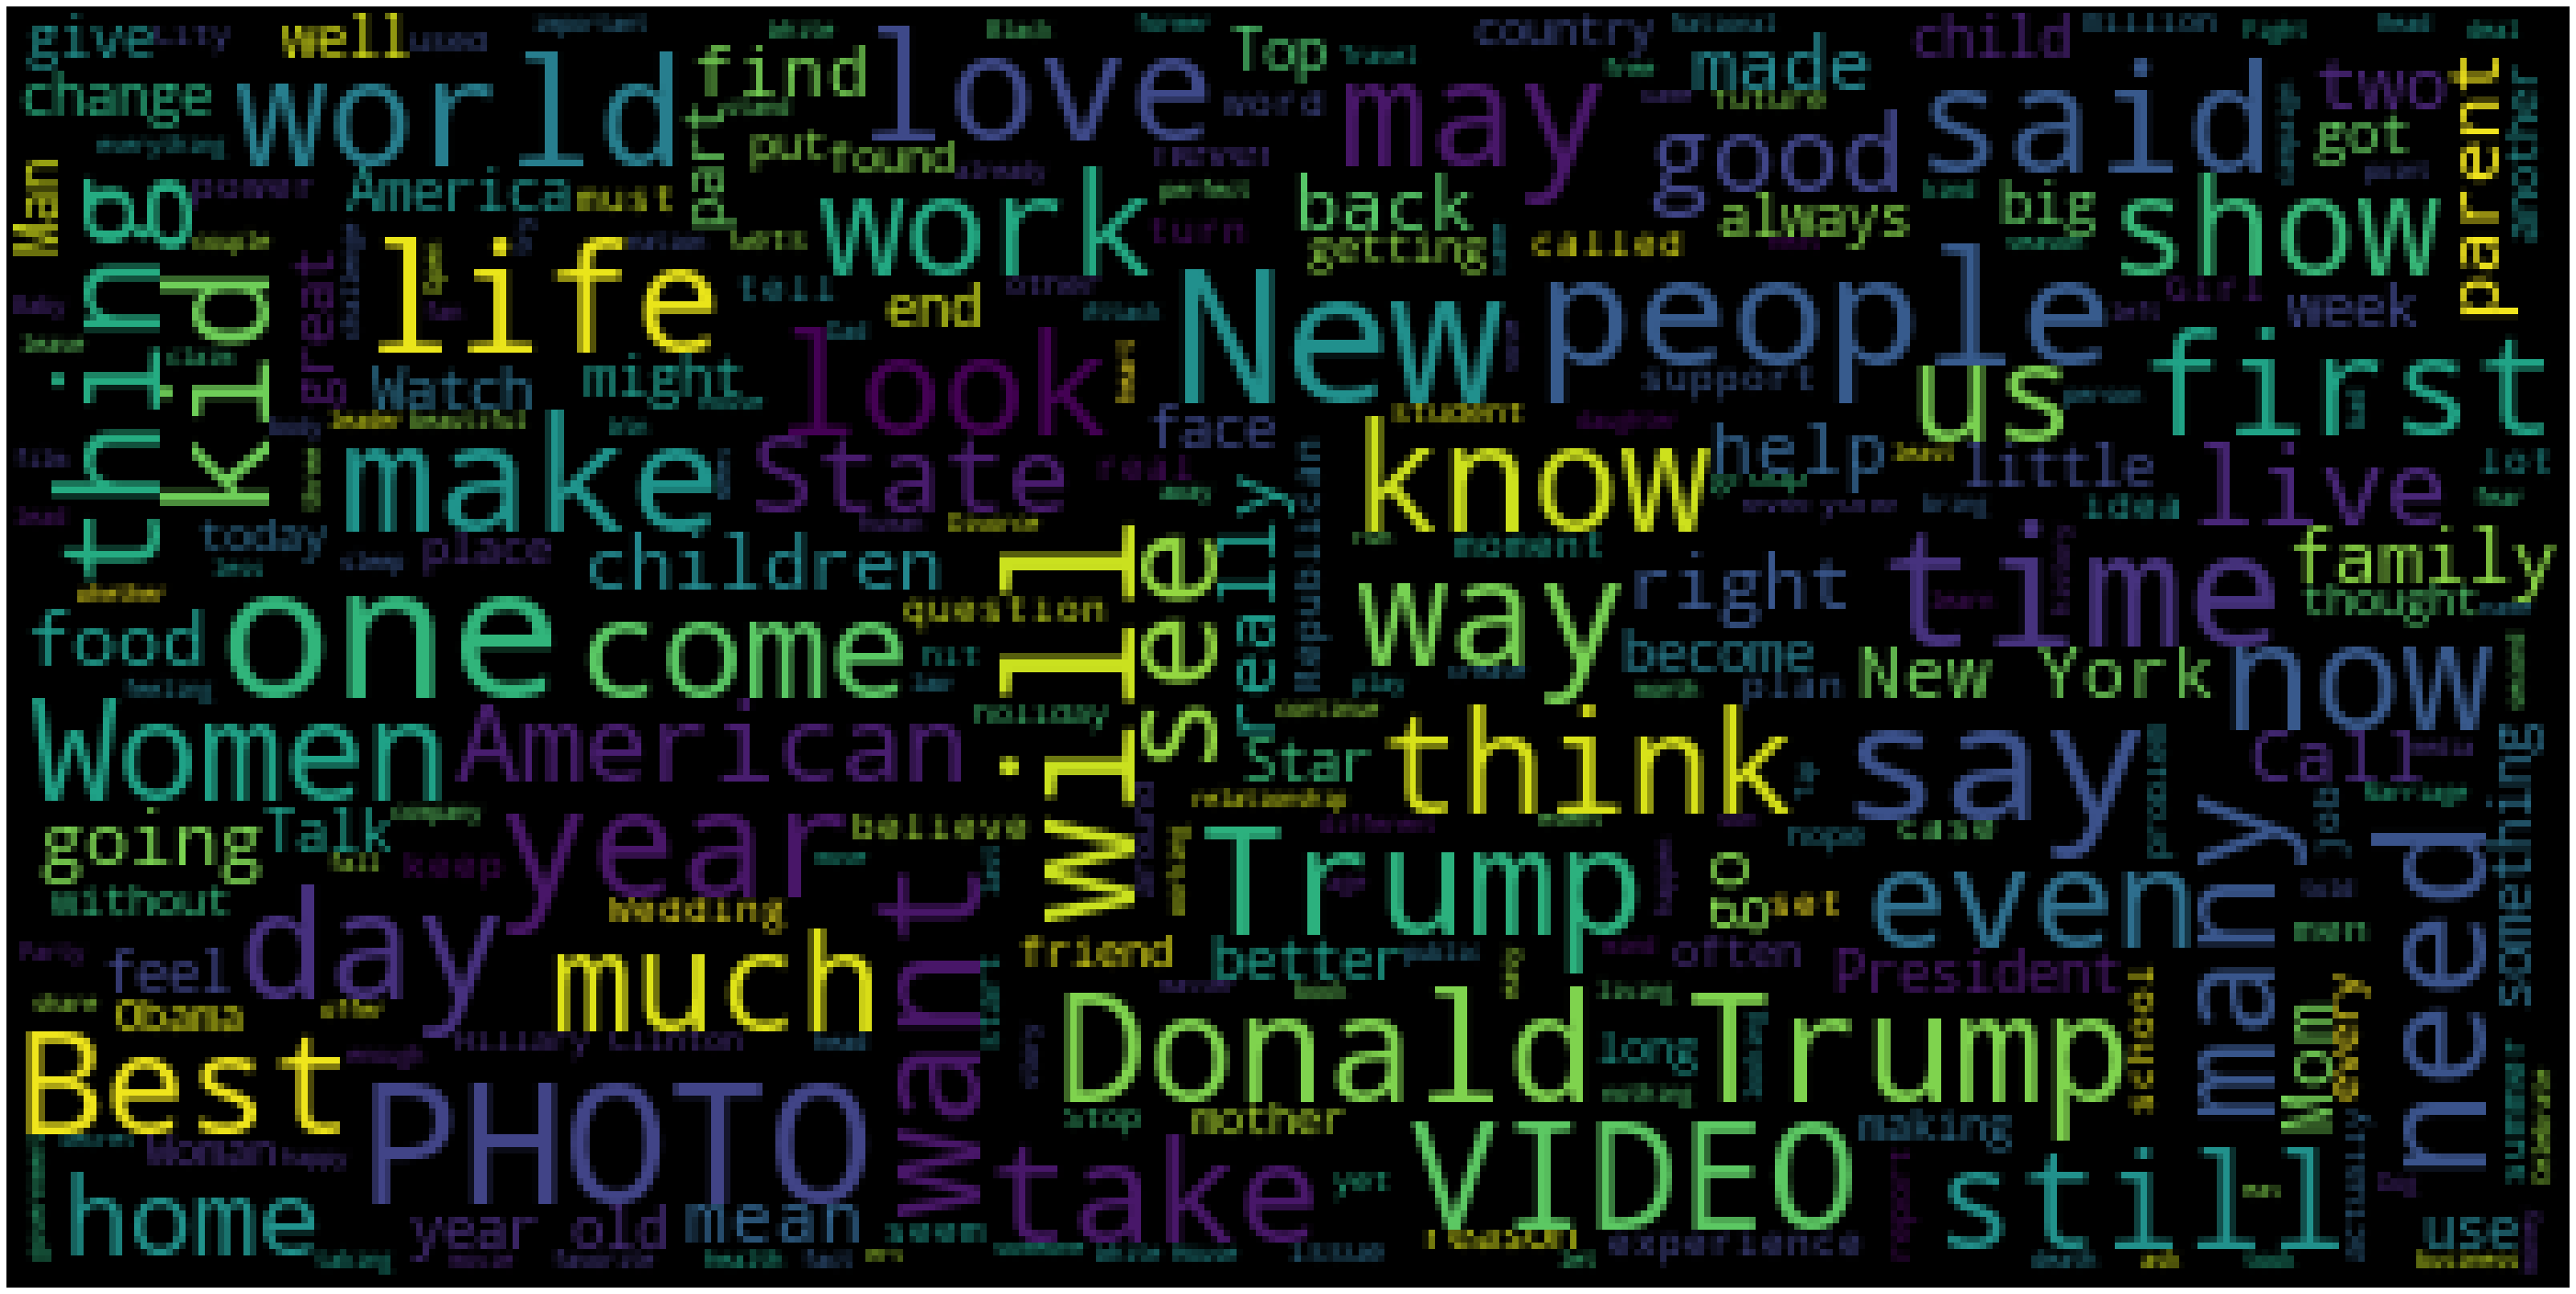

In [49]:
train_text = " ".join(train_title)
wordcloud = WordCloud().generate(train_text)
plt.figure()
plt.subplots(figsize=(50,50))
wordcloud = WordCloud(
    background_color="Black",
    max_words=len(train_text),
    max_font_size=30,
    relative_scaling=.5).generate(train_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Data Preprocessing
# Vectorizing the data using Bag of words (BOW)

In [0]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
c_vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

In [51]:
c_vectorizer.fit(iter(train_title))
X_train = c_vectorizer.transform(iter(train_title))
X_devp = c_vectorizer.transform(iter(devp_title))
X_test = c_vectorizer.transform(iter(test_title))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


**Categorical Encoding of category Column using Label Encoder**

In [0]:
encoder = LabelEncoder()
encoder.fit(train_category)
Y_train = encoder.transform(train_category)
Y_devp = encoder.transform(devp_category)
Y_test = encoder.transform(test_category)


**Feature Reduction**

In [53]:
print("Number of features before reduction : ", X_train.shape[1])
selection = VarianceThreshold(threshold=0.001)
X_train_whole = copy.deepcopy(X_train)
Y_train_whole = copy.deepcopy(Y_train)
selection.fit(X_train)
X_train = selection.transform(X_train)
X_devp = selection.transform(X_devp)
X_test = selection.transform(X_test)
print("Number of features after reduction : ", X_train.shape[1])


Number of features before reduction :  126219
Number of features after reduction :  3380


**Sampling the data**

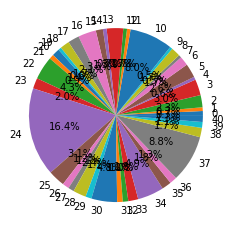

In [21]:
labels = list(set(Y_train))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Y_train == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


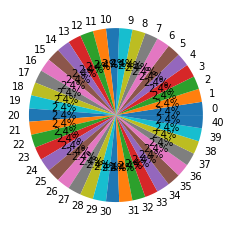

In [22]:
sm = SMOTE(random_state=41)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
labels = list(set(Y_train))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Y_train == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()


**Decision Tree Model**

In [23]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)
dtc_pred = dtc_model.predict(X_devp)
print(classification_report(Y_devp, dtc_pred, target_names=encoder.classes_))

                precision    recall  f1-score   support

          ARTS       0.09      0.13      0.10       297
ARTS & CULTURE       0.06      0.14      0.08       225
  BLACK VOICES       0.23      0.22      0.23       803
      BUSINESS       0.19      0.16      0.17      1097
       COLLEGE       0.15      0.29      0.19       226
        COMEDY       0.28      0.27      0.28       961
         CRIME       0.23      0.35      0.28       647
CULTURE & ARTS       0.13      0.23      0.16       186
       DIVORCE       0.35      0.54      0.42       640
     EDUCATION       0.11      0.22      0.15       196
 ENTERTAINMENT       0.40      0.24      0.30      3023
   ENVIRONMENT       0.09      0.25      0.14       259
         FIFTY       0.05      0.10      0.06       258
  FOOD & DRINK       0.37      0.37      0.37      1182
     GOOD NEWS       0.06      0.08      0.07       263
         GREEN       0.15      0.16      0.16       506
HEALTHY LIVING       0.16      0.17      0.16  

**Random Forest Model**

In [24]:
rf_model = RandomForestClassifier(n_estimators=40)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_devp)
print(classification_report(Y_devp, rf_pred, target_names=encoder.classes_))

                precision    recall  f1-score   support

          ARTS       0.08      0.12      0.10       297
ARTS & CULTURE       0.07      0.15      0.09       225
  BLACK VOICES       0.31      0.26      0.28       803
      BUSINESS       0.30      0.21      0.25      1097
       COLLEGE       0.20      0.44      0.28       226
        COMEDY       0.39      0.30      0.34       961
         CRIME       0.27      0.47      0.35       647
CULTURE & ARTS       0.16      0.25      0.19       186
       DIVORCE       0.41      0.63      0.50       640
     EDUCATION       0.15      0.32      0.20       196
 ENTERTAINMENT       0.56      0.29      0.38      3023
   ENVIRONMENT       0.12      0.32      0.17       259
         FIFTY       0.06      0.13      0.08       258
  FOOD & DRINK       0.44      0.45      0.45      1182
     GOOD NEWS       0.06      0.07      0.06       263
         GREEN       0.21      0.19      0.20       506
HEALTHY LIVING       0.21      0.17      0.19  

**Multinomial Naive Bayes Model**

In [54]:
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
nb_pred = nb_model .predict(X_devp)
print(classification_report(Y_devp, nb_pred, target_names=encoder.classes_))

                precision    recall  f1-score   support

          ARTS       0.24      0.19      0.21       297
ARTS & CULTURE       0.21      0.12      0.15       225
  BLACK VOICES       0.37      0.27      0.31       803
      BUSINESS       0.42      0.39      0.41      1097
       COLLEGE       0.37      0.31      0.34       226
        COMEDY       0.45      0.40      0.42       961
         CRIME       0.39      0.67      0.49       647
CULTURE & ARTS       0.31      0.26      0.28       186
       DIVORCE       0.61      0.63      0.62       640
     EDUCATION       0.32      0.36      0.34       196
 ENTERTAINMENT       0.57      0.60      0.58      3023
   ENVIRONMENT       0.39      0.25      0.30       259
         FIFTY       0.14      0.11      0.12       258
  FOOD & DRINK       0.53      0.69      0.60      1182
     GOOD NEWS       0.28      0.20      0.23       263
         GREEN       0.31      0.31      0.31       506
HEALTHY LIVING       0.27      0.15      0.19  

**Support Vector Classification**


In [56]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, Y_train)
svc_pred = svc_model.predict(X_devp)
print(classification_report(Y_devp, svc_pred, target_names=encoder.classes_))
	


                precision    recall  f1-score   support

          ARTS       0.24      0.11      0.15       297
ARTS & CULTURE       0.28      0.07      0.11       225
  BLACK VOICES       0.47      0.24      0.32       803
      BUSINESS       0.46      0.33      0.39      1097
       COLLEGE       0.39      0.28      0.32       226
        COMEDY       0.59      0.31      0.41       961
         CRIME       0.53      0.51      0.52       647
CULTURE & ARTS       0.74      0.17      0.27       186
       DIVORCE       0.81      0.56      0.66       640
     EDUCATION       0.34      0.11      0.16       196
 ENTERTAINMENT       0.41      0.69      0.52      3023
   ENVIRONMENT       0.89      0.15      0.26       259
         FIFTY       0.41      0.03      0.06       258
  FOOD & DRINK       0.57      0.67      0.62      1182
     GOOD NEWS       0.40      0.08      0.13       263
         GREEN       0.32      0.15      0.21       506
HEALTHY LIVING       0.40      0.25      0.31  

In [57]:
#Predicting using Naive Bayes 
print("\n\nPredicting test data using Multinomial Naive Bayesian")
pred_final = nb_model.predict(X_test)
print(classification_report(Y_test, pred_final, target_names=encoder.classes_))



Predicting test data using Multinomial Naive Bayesian
                precision    recall  f1-score   support

          ARTS       0.27      0.22      0.24       367
ARTS & CULTURE       0.25      0.13      0.17       335
  BLACK VOICES       0.41      0.31      0.35      1170
      BUSINESS       0.45      0.42      0.44      1480
       COLLEGE       0.40      0.38      0.39       278
        COMEDY       0.43      0.41      0.42      1283
         CRIME       0.39      0.66      0.49       834
CULTURE & ARTS       0.30      0.29      0.29       238
       DIVORCE       0.62      0.63      0.62       847
     EDUCATION       0.35      0.44      0.39       250
 ENTERTAINMENT       0.57      0.60      0.58      3981
   ENVIRONMENT       0.39      0.28      0.32       318
         FIFTY       0.16      0.11      0.13       366
  FOOD & DRINK       0.51      0.66      0.58      1578
     GOOD NEWS       0.26      0.20      0.23       348
         GREEN       0.32      0.33      0.33  

In [60]:
reverse_vocabulary = {}
vocabulary = c_vectorizer.vocabulary_
for word in vocabulary:
    index = vocabulary[word]
    reverse_vocabulary[index] = word

vector = c_vectorizer.transform(iter(['Nasa scientists are good']))
indexes = vector.indices
for i in indexes:
    print (reverse_vocabulary[i])



good
nasa
scientists


In [62]:
nb1_model=MultinomialNB()
nb1_model.fit(X_train_whole, Y_train_whole)
coefs = nb1_model.coef_
target_names = encoder.classes_

for i in range(len(target_names)):
    words = []
    for j in coefs[i].argsort()[-20:]:
        words.append(reverse_vocabulary[j])
    print (target_names[i], '-', words, "\n")

ARTS - ['city', 'make', 'love', 'years', 'two', 'film', 'music', 'show', 'time', 'work', 'life', 'york', 'artists', 'like', 'world', 'first', 'artist', 'one', 'new', 'art'] 

ARTS & CULTURE - ['photos', 'first', 'get', 'time', 'make', 'like', 'years', 'show', 'year', 'books', 'world', 'artists', 'people', 'one', 'women', 'trump', 'new', 'book', 'artist', 'art'] 

BLACK VOICES - ['african', 'america', 'man', 'us', 'day', 'lives', 'american', 'history', 'time', 'says', 'first', 'one', 'women', 'year', 'white', 'said', 'people', 'police', 'new', 'black'] 

BUSINESS - ['day', '24', 'like', 'years', 'year', 'get', 'make', 'u', 'companies', '7', 'world', 'work', 'wall', 'company', 'women', 'one', 'time', 'people', 'new', 'business'] 

COLLEGE - ['first', 'life', 'like', 'people', 'rape', 'many', 'assault', 'higher', 'school', 'time', 'colleges', 'one', 'new', 'sexual', 'campus', 'education', 'student', 'university', 'students', 'college'] 

COMEDY - ['fallon', 'day', 'late', 'time', 'maher',

In [0]:
svc1_model=SVC()
svc1_model.fit(X_train_whole, Y_train_whole)
coefs = svc1_model.coef_
target_names = encoder.classes_

for i in range(len(target_names)):
    words = []
    for j in coefs[i].argsort()[-20:]:
        words.append(reverse_vocabulary[j])
    print (target_names[i], '-', words, "\n")